In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import numpy as np

# Importing the data
The data is imported using pandas_datareader package which allows us to import data from varios sources. For this project the data of Infosys stock is imported from yahoo.

In [2]:
df = data.get_data_yahoo('INFY.NS',
                         start ='2019-11-01',
                         end ='2020-12-01',
                         interval = 'd')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-01,694.000000,682.599976,690.000000,687.900024,9713519.0,671.448853
2019-11-04,732.500000,678.150024,681.799988,709.000000,29381982.0,692.044189
2019-11-05,708.750000,691.500000,708.750000,696.099976,12897805.0,679.452637
2019-11-06,721.500000,692.000000,695.799988,712.299988,21372589.0,695.265259
2019-11-07,724.349976,712.099976,717.000000,720.099976,13733737.0,702.878723
...,...,...,...,...,...,...
2020-11-24,1154.900024,1133.349976,1145.000000,1140.050049,8515426.0,1140.050049
2020-11-25,1143.500000,1111.250000,1137.000000,1115.650024,8958701.0,1115.650024
2020-11-26,1119.949951,1098.300049,1119.949951,1113.199951,10962256.0,1113.199951


# Creating MACD and signal lines 
Using the adjusted close price the MACD and signal lines are computed. First the 12 day exponential moving average and 26 day exponential moving average is calculated which is required to compute MACD and signal line. MACD line is computed by subtracting the 26 day exponential moving average from 12 day moving average. Signal line is the 9 day exponential moving average of the MACD line. The MACD and signal lines help determine if we should buy or sell the stock. When MACD line crosses from below to above the signal line, it is a buy signal and when MACD line crosses above to below the signal line, it is a sell signal. Also removing the following columns - High, Low, Open, Close and Volume from the dataframe as these are not required.

In [3]:
df['26MA'] = df['Adj Close'].ewm(span = 26,min_periods=0,adjust=False,ignore_na=False).mean()
df['12MA'] = df['Adj Close'].ewm(span = 12,min_periods=0,adjust=False,ignore_na=False).mean()
df['MACD'] = df['12MA'] - df['26MA']
df['Signal Line'] = df['MACD'].ewm(span = 9,min_periods=0,adjust=False,ignore_na=False).mean()
df = df.drop(columns = ['High', 'Low', 'Open','Close', 'Volume'])
df

,Adj Close,26MA,12MA,MACD,Signal Line
Date,,,,,
2019-11-01,671.448853,671.448853,671.448853,0.000000,0.000000
2019-11-04,692.044189,672.974433,674.617366,1.642933,0.328587
2019-11-05,679.452637,673.454300,675.361254,1.906954,0.644260
2019-11-06,695.265259,675.069927,678.423408,3.353482,1.186104
2019-11-07,702.878723,677.129837,682.185764,5.055927,1.960069
...,...,...,...,...,...
2020-11-24,1140.050049,1101.365824,1116.434222,15.068397,15.198179
2020-11-25,1115.650024,1102.423913,1116.313576,13.889663,14.936475
2020-11-26,1113.199951,1103.222138,1115.834557,12.612418,14.471664


# Plotting the stock price and MACD crossovers

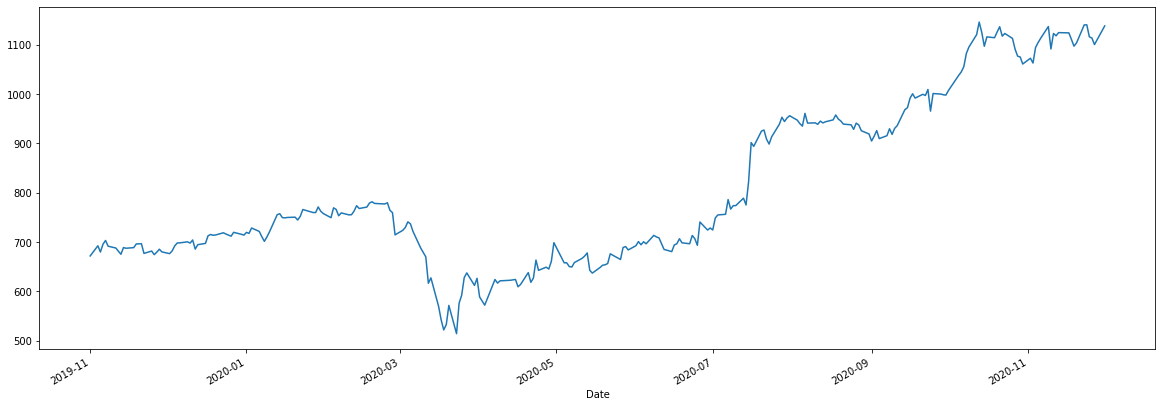

In [4]:
df['Adj Close'].plot(figsize = (20,7))

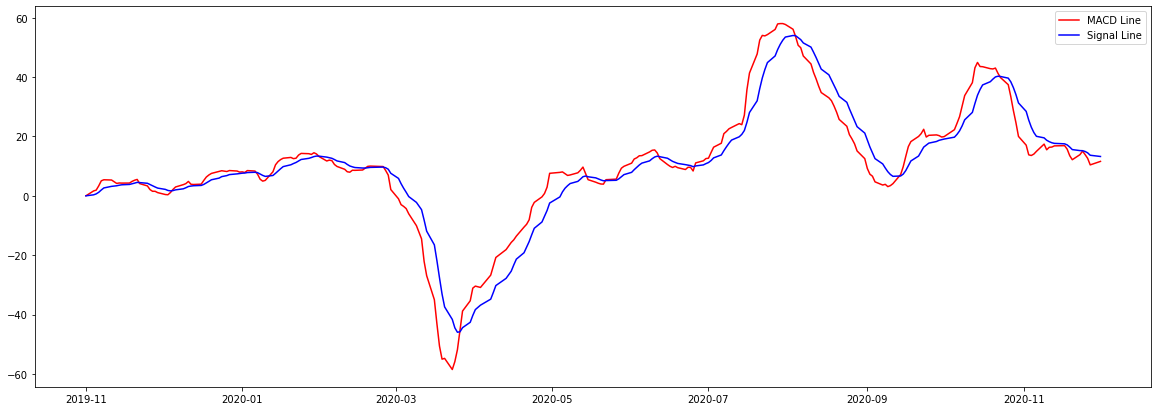

In [5]:
plt.figure(figsize=(20,7)) 
plt.plot(df.index, df['MACD'], label = 'MACD Line', color = 'red')
plt.plot(df.index, df['Signal Line'], label='Signal Line', color='blue')
plt.legend()
plt.show()

# Creating buy and sell signals
Now that the MACD and signal lines are computed, creating buy signals at points where MACD line crosses from below to above the signal line and sell signals at points where MACD line crosses from above to below the signal line.

In [6]:
df

,Adj Close,26MA,12MA,MACD,Signal Line
Date,,,,,
2019-11-01,671.448853,671.448853,671.448853,0.000000,0.000000
2019-11-04,692.044189,672.974433,674.617366,1.642933,0.328587
2019-11-05,679.452637,673.454300,675.361254,1.906954,0.644260
2019-11-06,695.265259,675.069927,678.423408,3.353482,1.186104
2019-11-07,702.878723,677.129837,682.185764,5.055927,1.960069
...,...,...,...,...,...
2020-11-24,1140.050049,1101.365824,1116.434222,15.068397,15.198179
2020-11-25,1115.650024,1102.423913,1116.313576,13.889663,14.936475
2020-11-26,1113.199951,1103.222138,1115.834557,12.612418,14.471664


Adding the following two columns - Buy Signal and Sell Signal to the dataframe. When MACD is greater than the Signal line appending the closing price to the Buy Signal and zero to the Sell Signal. When Signal line is greater than the MACD appending the closing price to the Sell Signal and zero to the Buy Signal.

In [7]:
BuySignal = []
SellSignal = []

for i in range(0, len(df['MACD'])):
    if df['MACD'][i] > df['Signal Line'][i]:
        BuySignal.append(df['Adj Close'][i])
        SellSignal.append(0)
    else:
        SellSignal.append(df['Adj Close'][i])
        BuySignal.append(0)

df['Buy Signal'] = BuySignal
df['Sell Signal'] = SellSignal


The closing price needs to appended in signal columns only on the days when the crossover takes place and then append zero after crossover takes place. The code in the above cell will keep appending the closing price even after crossover takes place. Hence, replacing the closing prices appended in Buy Signal and Sell Signal columns with zero after the crossover takes place.

In [8]:
for i in range(1,len(df['Buy Signal'])-1):
    if df['MACD'][i] > df['Signal Line'][i]:
        df['Buy Signal'][i+1] = 0
    else:
        df['Sell Signal'][i+1] = 0

In [9]:
df = df[1:]
df

,Adj Close,26MA,12MA,MACD,Signal Line,Buy Signal,Sell Signal
Date,,,,,,,
2019-11-04,692.044189,672.974433,674.617366,1.642933,0.328587,692.044189,0.0
2019-11-05,679.452637,673.454300,675.361254,1.906954,0.644260,0.000000,0.0
2019-11-06,695.265259,675.069927,678.423408,3.353482,1.186104,0.000000,0.0
2019-11-07,702.878723,677.129837,682.185764,5.055927,1.960069,0.000000,0.0
2019-11-08,691.214539,678.173149,683.574807,5.401658,2.648387,0.000000,0.0
...,...,...,...,...,...,...,...
2020-11-24,1140.050049,1101.365824,1116.434222,15.068397,15.198179,0.000000,0.0
2020-11-25,1115.650024,1102.423913,1116.313576,13.889663,14.936475,0.000000,0.0
2020-11-26,1113.199951,1103.222138,1115.834557,12.612418,14.471664,0.000000,0.0


If we begin with buying a stock we need to sell it to close our position and vice versa. We can have an additional last signal which we will replace with zero.

In [10]:
if (df['Buy Signal'] != 0).sum() != (df['Sell Signal'] != 0).sum():
    if (df['Buy Signal'] != 0).sum() > (df['Sell Signal'] != 0).sum():
        i = -1
        while df['Buy Signal'][i] == 0:
            i = i-1
            pass
            if df['Buy Signal'][i] != 0:
                df['Buy Signal'][i] = 0
                break
    else:
        i = -1
        while df['Sell Signal'][i] == 0:
            i = i-1
            pass
            if df['Sell Signal'][i] != 0:
                df['Sell Signal'][i] = 0
                break
else:
    pass

# Computing ROI percent using the MACD strategy

In [11]:
((df['Sell Signal'].sum() - df['Buy Signal'].sum())/df['Adj Close'][0])*100

51.20585243911603

# Plotting the signals
Replacing the zeroes in the Buy Signal and Sell Signal with NaN using the numpy library. The reason for doing this is zero values must not be plotted while plotting the signals. 

In [12]:
df = df.replace({0:(np.nan)})
df

,Adj Close,26MA,12MA,MACD,Signal Line,Buy Signal,Sell Signal
Date,,,,,,,
2019-11-04,692.044189,672.974433,674.617366,1.642933,0.328587,692.044189,NaN
2019-11-05,679.452637,673.454300,675.361254,1.906954,0.644260,NaN,NaN
2019-11-06,695.265259,675.069927,678.423408,3.353482,1.186104,NaN,NaN
2019-11-07,702.878723,677.129837,682.185764,5.055927,1.960069,NaN,NaN
2019-11-08,691.214539,678.173149,683.574807,5.401658,2.648387,NaN,NaN
...,...,...,...,...,...,...,...
2020-11-24,1140.050049,1101.365824,1116.434222,15.068397,15.198179,NaN,NaN
2020-11-25,1115.650024,1102.423913,1116.313576,13.889663,14.936475,NaN,NaN
2020-11-26,1113.199951,1103.222138,1115.834557,12.612418,14.471664,NaN,NaN


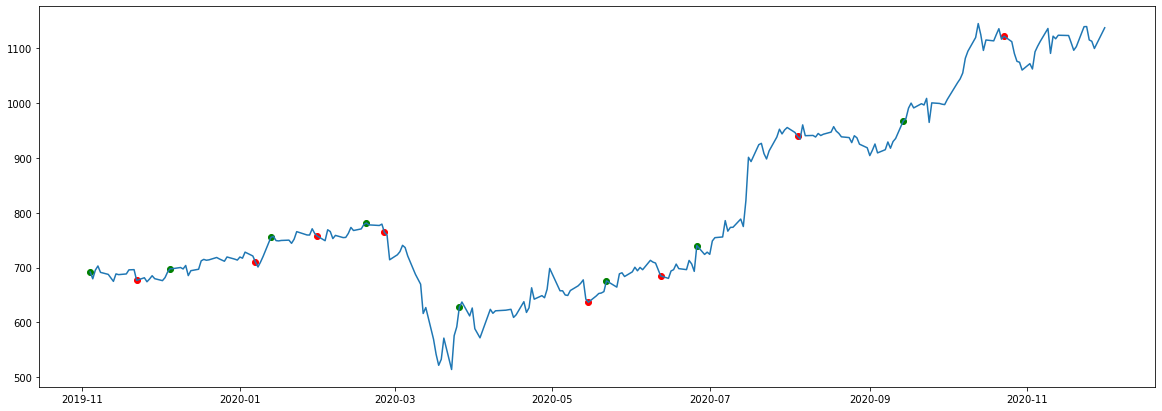

In [13]:
plt.figure(figsize=(20,7)) 
plt.plot(df['Adj Close'])
plt.scatter(df.index,df['Buy Signal'], Color = 'Green')
plt.scatter(df.index,df['Sell Signal'], Color = 'Red')